# Importamos las librerias

In [55]:
import numpy as np
import os
import pandas as pd
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.express as px
import seaborn as sns; sns.set()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import statsmodels.api as sm
%matplotlib inline

from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error

## 1 PCA

### Importamos el data set

In [25]:
def download_files():
    """
    Este metodo descarga los archivos de imagenes sino existen
    """
    path_tar = os.path.join("data",'faces.zip')
    if not isfile(path_tar):
        urlretrieve(
            'http://courses.media.mit.edu/2002fall/mas622j/proj/faces/rawdata.zip',
            path_tar)
    dest_path =  "data/faces"
    with zipfile.ZipFile(path_tar) as tar:
        tar.extractall(dest_path)
        tar.close()
download_files()

In [26]:
d_name = 'data/faces/rawdata'
sample = 0.2
X = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)

### Funciones para mostrar las imagenes agrupadas.

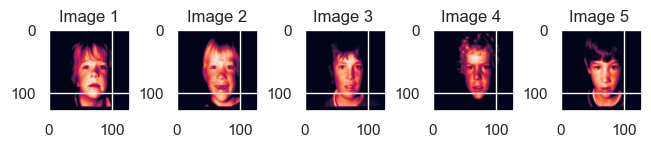

In [27]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data,ix_1, ix_2 , ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    plt.show()

def plot_5_images(data,ix_1, ix_2 , ix_3,ix_4,ix_5):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,5, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_3]))
    ax[2].set_title(label="Image %s "% ix_3)
    ax[3].imshow(fn_shape(data[ix_4]))
    ax[3].set_title(label="Image %s "% ix_4)
    ax[4].imshow(fn_shape(data[ix_5]))
    ax[4].set_title(label="Image %s "% ix_5)
    plt.show()

plot_5_images(X,1,2,3,4,5)

### 1. Calcular la mean face. Que es la cara con el promedio de los pixeles.

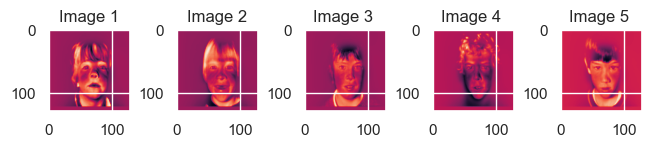

In [28]:
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_5_images(X_center,1, 2 ,3,4,5)

###  Centrar los datos, utilizar PCA

In [29]:
pca = PCA(n_components=200)
X_reduced = pca.fit_transform(X_center)


eigen_values = pca.explained_variance_
eigen_faces = pca.components_

## Reconstruccion de las imagenes:

### Calculamos los porcentajes que eplican la varianza de las imagenes

In [30]:
def CalculoPorcentaje(porcentage, eingen_values):
    actual =0
    suma=0
    for a in range(len(eingen_values)):
        suma = suma + eingen_values[a]
    for i in range(len(eingen_values)):
        actual =  actual +  eingen_values[i]/suma
        if actual>= porcentage:
            return i
val_90_porciento = CalculoPorcentaje(0.9,eigen_values)
val_99_porciento = CalculoPorcentaje(0.99,eigen_values)

print(val_90_porciento)
print(val_99_porciento)



41
158


## Reconstruimos cada grupo de caras segun los valores de la tabla

- Imagen 1:

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

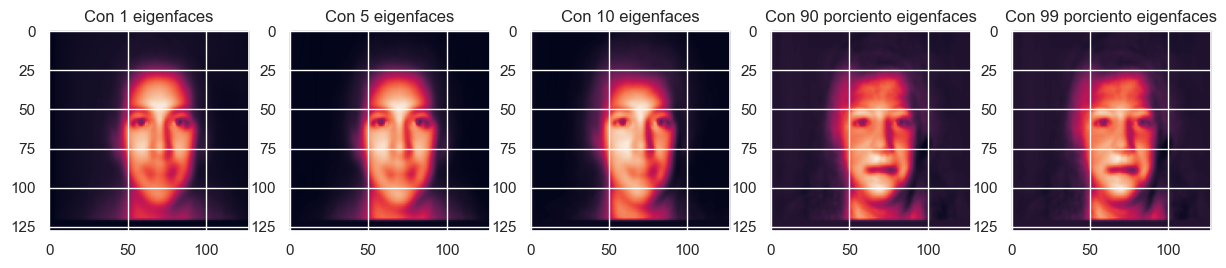

In [31]:
face_1 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:val_90_porciento], eigen_faces[:val_90_porciento,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:val_99_porciento], eigen_faces[:val_99_porciento,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

- Imagen 2:

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

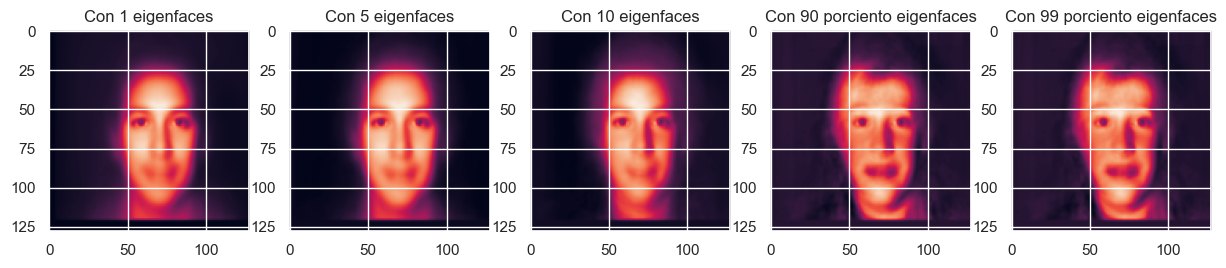

In [32]:
face_1 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:val_90_porciento], eigen_faces[:val_90_porciento,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:val_99_porciento], eigen_faces[:val_99_porciento,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

- Imagen 3:

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

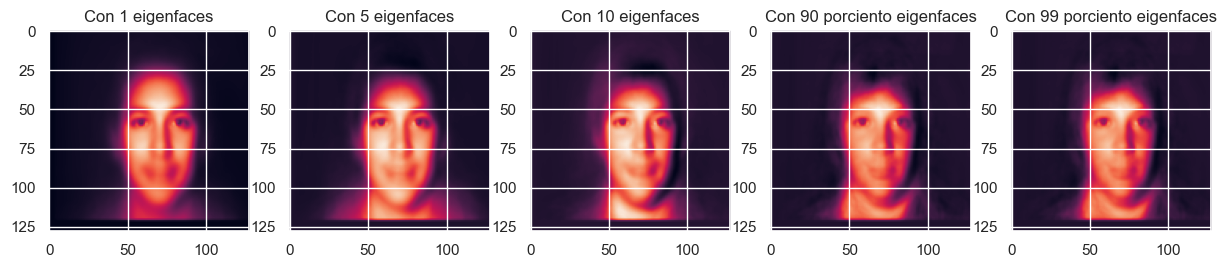

In [33]:
face_1 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:val_90_porciento], eigen_faces[:val_90_porciento,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:val_99_porciento], eigen_faces[:val_99_porciento,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

- Imagen 4:

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

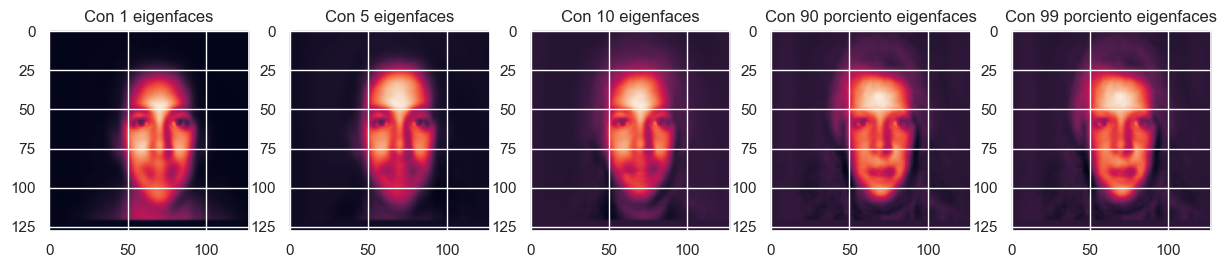

In [34]:
face_1 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:val_90_porciento], eigen_faces[:val_90_porciento,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:val_99_porciento], eigen_faces[:val_99_porciento,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

- Imagen 5:

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

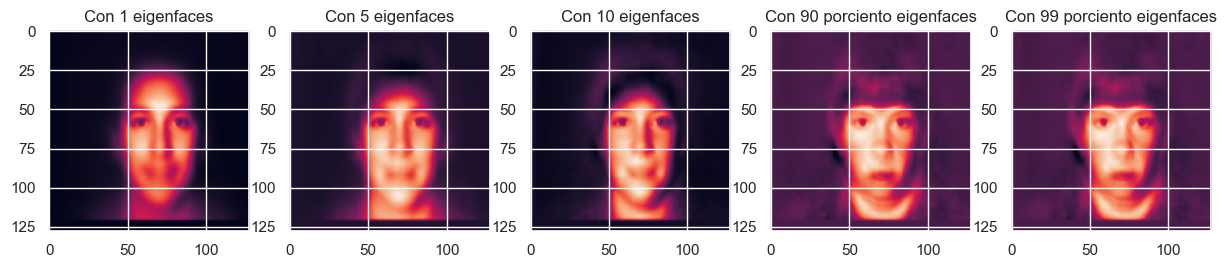

In [35]:
face_1 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:val_90_porciento], eigen_faces[:val_90_porciento,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:val_99_porciento], eigen_faces[:val_99_porciento,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

* Como pdemos observar la reconstrccion de las caras se da desde el centro hasta el exterior
* El 90% y 99% de los datos se explica con las primeras compomentes ya que son las mar cercanas al centro y mas relevantes, dejando los bordes para el final donde hay mejos informacion.
* La mean face permite hacer una reconstrccion razonable de los datos segun el numero de componentes que se utilicen, se sugiere el uso de almenos 80% para una reconstruccion notable.
* Las transformaciones pueden ser muy utiles para el manejo de datos muy extenso o altamente cargodos de datos. La reduccion favorece su portavilidad pero su reconstruccion es un tema dificil de tratar.

# 2 K-means


### Se crea la clase Kmean

In [36]:
class Kmeans:
    
    def __init__(self, k):
        self.k = k
        self.mu = None
        self.his_mu = []
        
    def calculate_labels(self,X):
        dis = -2 * np.dot(X, self.mu.T) 
        dis = dis + np.power(X, 2).sum(axis=1).reshape((-1, 1))
        dis = dis + np.power(self.mu,2).sum(axis=1)
        n_l = dis.argsort(axis=1)[:,0].reshape((-1,1))
        return n_l
    
    def train(self, X, verbose=False):
        X = np.array(X)
        l = np.random.randint(0,high=self.k,size=(X.shape[0],1))
        n_l = None
        while n_l is None or not np.array_equal(l,n_l):
            cur_mu = []
            if n_l is not None:
                l = n_l
            X_l = np.hstack((X,l))
            for i in range(self.k):
                cur_mu.append( 
                    np.mean(
                        X_l[np.where(X_l[:,-1]==i),:-1],
                        axis=1
                    )
                )
            self.mu = np.vstack(cur_mu) 
            self.his_mu.append(self.mu)
            n_l = self.calculate_labels(X)
            if verbose: print(self.mu)
                
    def predict(self,X):
        n_l = self.calculate_labels(X)
        return n_l

### se reduce la dimension y se dividen los datos en train y test

Explained variation per principal component: 0.07692307692307698


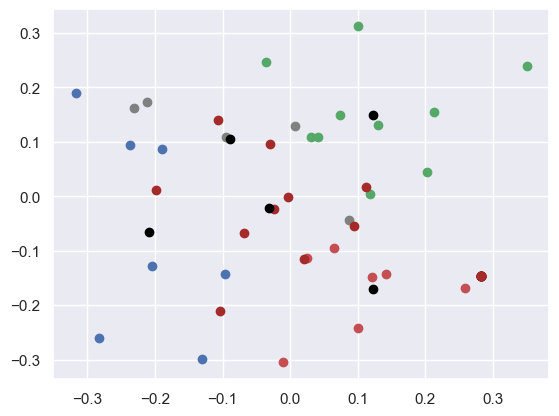

In [61]:
def reduce_dim_pca(components, X_train, X_test):
    pca = PCA(n_components=components)
    X_r = pca.fit(X_train).transform(X_train)
    X_nr = pca.transform(X_test)
    text = 'Explained variation per principal component: {}'
    print(text.format(np.sum(pca.explained_variance_ratio_[:components])))
    return X_r, X_nr
faces_test, faces_train = train_test_split(eigen_faces, test_size= 0.2)
X_r, X_nr = reduce_dim_pca(3,faces_train,faces_test)



fig, ax = plt.subplots(1,1)
kmeans = Kmeans(5)
kmeans.train(X_r)
label = kmeans.predict(X_r)
 
ax.scatter(X_r[np.where(label==0),0],X_r[np.where(label==0),1],c='r')
ax.scatter(X_r[np.where(label==1),0],X_r[np.where(label==1),1],c='b')
ax.scatter(X_r[np.where(label==2),0],X_r[np.where(label==2),1],c='g')
ax.scatter(X_r[np.where(label==3),0],X_r[np.where(label==3),1],c='gray')
ax.scatter(X_r[np.where(label==4),0],X_r[np.where(label==4),1],c='brown')
ax.scatter(kmeans.mu[:,0], kmeans.mu[:,1], c='black')

### Centroides

In [59]:
print(kmeans.mu)

[[ 0.1156508  -0.14961666 -0.04653024]
 [ 0.18774308  0.139544    0.18157075]
 [ 0.05386083  0.01930067 -0.25143945]
 [-0.13388518  0.11509128  0.00865272]
 [-0.0906175  -0.17890305  0.09699553]]


In [82]:
sorted(list(enumerate(X_r)), key= lambda x: np.linalg.norm(x[1]-kmeans.mu[0]))


[(14, array([ 0.14179405, -0.14223167,  0.00112083])),
 (21, array([ 0.02438586, -0.11274211,  0.04933267])),
 (38, array([ 0.25886933, -0.16852419,  0.01249768])),
 (8, array([ 0.12146377, -0.14894133, -0.08014689])),
 (23, array([ 0.02086095, -0.11612542, -0.03555199])),
 (0, array([ 0.28201285, -0.14684373,  0.00700146])),
 (11, array([ 0.0941571 , -0.05426464, -0.06188833])),
 (28, array([ 0.06417212, -0.09432564,  0.22939829])),
 (39, array([0.11815145, 0.00406523, 0.14968026])),
 (37, array([-0.01048818, -0.30457748, -0.03261214])),
 (24, array([ 0.1116682 ,  0.016863  , -0.06010933])),
 (34, array([-0.02356519, -0.02373389, -0.08072574])),
 (4, array([-0.00300871, -0.00068025, -0.07568919])),
 (32, array([ 0.20302655,  0.04450833, -0.05542033])),
 (15, array([-0.09682953, -0.14250253,  0.22608218])),
 (36, array([-0.06834343, -0.0680167 , -0.10051867])),
 (27, array([0.04045191, 0.10816444, 0.11410125])),
 (25, array([0.03116267, 0.10872862, 0.04744567])),
 (20, array([-0.130026

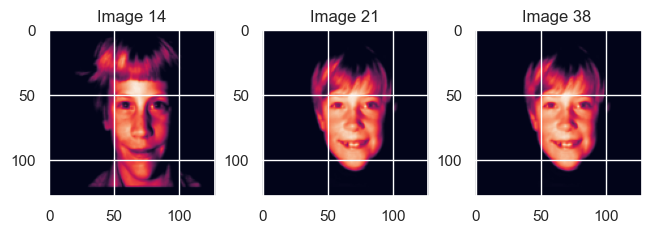

In [83]:
plot_3_images(X,14, 21 , 38)

In [80]:
sorted(list(enumerate(X_r)), key= lambda x: np.linalg.norm(x[1]-kmeans.mu[1]))


[(19, array([-0.20462236, -0.12825455,  0.09127867])),
 (3, array([-0.18969849,  0.08722114,  0.15792755])),
 (22, array([-0.23637127,  0.09440684,  0.11545273])),
 (15, array([-0.09682953, -0.14250253,  0.22608218])),
 (10, array([-0.19780709,  0.01215168, -0.08413879])),
 (31, array([-0.10657933,  0.14000646,  0.03048211])),
 (21, array([ 0.02438586, -0.11274211,  0.04933267])),
 (36, array([-0.06834343, -0.0680167 , -0.10051867])),
 (13, array([-0.03015532,  0.09589225, -0.01004316])),
 (34, array([-0.02356519, -0.02373389, -0.08072574])),
 (23, array([ 0.02086095, -0.11612542, -0.03555199])),
 (16, array([-0.28263589, -0.26116008, -0.07170885])),
 (20, array([-0.13002624, -0.29961526, -0.03220097])),
 (28, array([ 0.06417212, -0.09432564,  0.22939829])),
 (4, array([-0.00300871, -0.00068025, -0.07568919])),
 (27, array([0.04045191, 0.10816444, 0.11410125])),
 (25, array([0.03116267, 0.10872862, 0.04744567])),
 (2, array([-0.1044764 , -0.21139697, -0.14353969])),
 (39, array([0.1181

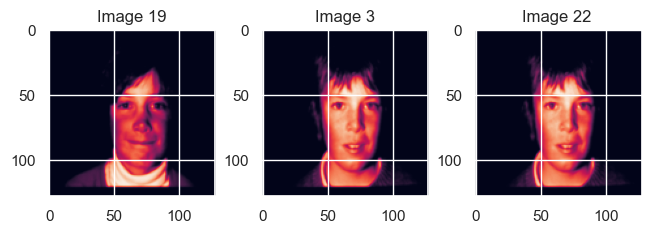

In [81]:
plot_3_images(X,19, 3 , 22)

In [78]:
sorted(list(enumerate(X_r)), key= lambda x: np.linalg.norm(x[1]-kmeans.mu[2]))


[(26, array([0.07305113, 0.1495934 , 0.00091863])),
 (25, array([0.03116267, 0.10872862, 0.04744567])),
 (27, array([0.04045191, 0.10816444, 0.11410125])),
 (35, array([ 0.21342322,  0.15566298, -0.07981455])),
 (32, array([ 0.20302655,  0.04450833, -0.05542033])),
 (24, array([ 0.1116682 ,  0.016863  , -0.06010933])),
 (13, array([-0.03015532,  0.09589225, -0.01004316])),
 (6, array([ 0.1305723 ,  0.1304967 , -0.12839591])),
 (39, array([0.11815145, 0.00406523, 0.14968026])),
 (18, array([0.10016604, 0.3128911 , 0.14953772])),
 (7, array([-0.03634389,  0.24756551,  0.12962279])),
 (31, array([-0.10657933,  0.14000646,  0.03048211])),
 (4, array([-0.00300871, -0.00068025, -0.07568919])),
 (11, array([ 0.0941571 , -0.05426464, -0.06188833])),
 (12, array([0.34990752, 0.24000445, 0.12563856])),
 (34, array([-0.02356519, -0.02373389, -0.08072574])),
 (21, array([ 0.02438586, -0.11274211,  0.04933267])),
 (23, array([ 0.02086095, -0.11612542, -0.03555199])),
 (14, array([ 0.14179405, -0.14

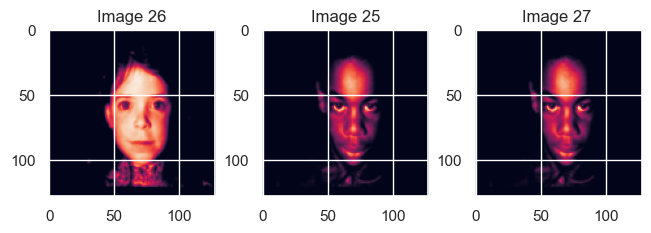

In [79]:
plot_3_images(X,26, 25 , 27)

In [84]:
sorted(list(enumerate(X_r)), key= lambda x: np.linalg.norm(x[1]-kmeans.mu[3]))

[(17, array([-0.09435605,  0.10814644, -0.19481213])),
 (29, array([ 0.00754436,  0.12907049, -0.30621971])),
 (5, array([-0.21111495,  0.17239543, -0.22721243])),
 (9, array([-0.23107286,  0.16235628, -0.22532045])),
 (10, array([-0.19780709,  0.01215168, -0.08413879])),
 (4, array([-0.00300871, -0.00068025, -0.07568919])),
 (34, array([-0.02356519, -0.02373389, -0.08072574])),
 (36, array([-0.06834343, -0.0680167 , -0.10051867])),
 (30, array([ 0.08732272, -0.04451352, -0.33613824])),
 (13, array([-0.03015532,  0.09589225, -0.01004316])),
 (6, array([ 0.1305723 ,  0.1304967 , -0.12839591])),
 (31, array([-0.10657933,  0.14000646,  0.03048211])),
 (24, array([ 0.1116682 ,  0.016863  , -0.06010933])),
 (26, array([0.07305113, 0.1495934 , 0.00091863])),
 (11, array([ 0.0941571 , -0.05426464, -0.06188833])),
 (25, array([0.03116267, 0.10872862, 0.04744567])),
 (23, array([ 0.02086095, -0.11612542, -0.03555199])),
 (2, array([-0.1044764 , -0.21139697, -0.14353969])),
 (35, array([ 0.21342

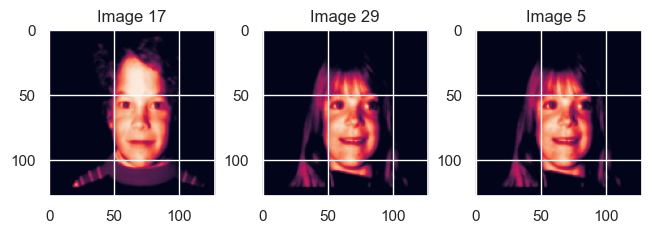

In [85]:
plot_3_images(X,17, 29 , 5)

In [86]:
sorted(list(enumerate(X_r)), key= lambda x: np.linalg.norm(x[1]-kmeans.mu[4]))

[(34, array([-0.02356519, -0.02373389, -0.08072574])),
 (4, array([-0.00300871, -0.00068025, -0.07568919])),
 (36, array([-0.06834343, -0.0680167 , -0.10051867])),
 (23, array([ 0.02086095, -0.11612542, -0.03555199])),
 (13, array([-0.03015532,  0.09589225, -0.01004316])),
 (11, array([ 0.0941571 , -0.05426464, -0.06188833])),
 (24, array([ 0.1116682 ,  0.016863  , -0.06010933])),
 (21, array([ 0.02438586, -0.11274211,  0.04933267])),
 (10, array([-0.19780709,  0.01215168, -0.08413879])),
 (25, array([0.03116267, 0.10872862, 0.04744567])),
 (17, array([-0.09435605,  0.10814644, -0.19481213])),
 (8, array([ 0.12146377, -0.14894133, -0.08014689])),
 (31, array([-0.10657933,  0.14000646,  0.03048211])),
 (26, array([0.07305113, 0.1495934 , 0.00091863])),
 (2, array([-0.1044764 , -0.21139697, -0.14353969])),
 (14, array([ 0.14179405, -0.14223167,  0.00112083])),
 (27, array([0.04045191, 0.10816444, 0.11410125])),
 (6, array([ 0.1305723 ,  0.1304967 , -0.12839591])),
 (32, array([ 0.2030265

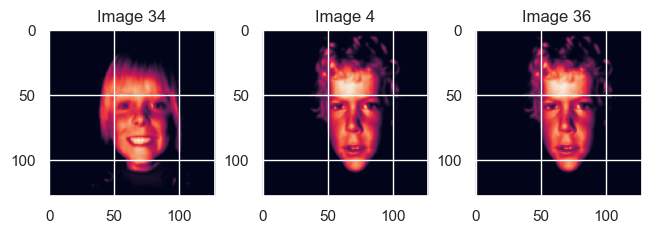

In [87]:
plot_3_images(X,34, 4 , 36)

* En los tres casos, podemos ver como 2 de las 3 caras resultan ser iguales.
* De igual forma podemos ver que la tercera de las caras tambien es muy parecida a las otras 2
* En el tercer caso, podemos ver una diferenca en el tono de piel de las fotografias, pero nos sirve para interpretar que lo mas importarte para el modelo es la forma de la cara sobre los demas datos.
* Se puede decir que el K-means fue eficiente para clasificar los datos basado en los resultados de las 3 caras mar cercanas a los centroides.

# 3 Regresion

### importamos el data frame y lo dividimos en test y train

In [38]:
df = pd.read_csv("./data/Prueba.csv")
df_test, df_train = train_test_split(df, test_size= 0.2)
df.describe(include = 'all')

C:\Users\jmora\AppData\Local\Temp\ipykernel_22564\810743192.py:1: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/Prueba.csv")


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DISC_FISICA,ESTU_DISC_SISTEM,ESTU_DISC_AUDITCASTELL,ESTU_DISC_AUDITLSC,ESTU_DISC_VISUALCEGUE,ESTU_DISC_VISUALBAJA,ESTU_DISC_VOZHABLA,ESTU_DISC_INTELEC,ESTU_DISC_ESPAUTISTA,ESTU_DISC_PSICOSOCIAL,ESTU_DISC_ASPERGER,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_COLE_TERMINO,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_SNIES_PRGMACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_ESTADOINVESTIGACION
count,68725,68725,68597,68667,68725,68725.0,68725,68725,68725,27,3,8,8,1,10,1,3,1,2,2,68688,68688.000000,68688,68688.00000,58499,58190,37609,3.760900e+04,37609.000000,11543,58465,58461,58461,58463,58461,58475,57799,58465,65210,65100,56760,60492,64573,64460,64325,64056,64006,63846,63817,63840,63783,63863,63706,63606,68725.000000,68725,68725,68661.000000,68725,68725.00000,68725,68725,68725,68725,68725,68725.000000,68725,68725,68725,68725,68725,68725.000000,68725,68725,68725.000000,68725.000000,68567.000000,68566.000000,68725.000000,68567.000000,68566.000000,68725.000000,68567.000000,68566.000000,68705.000000,68705,68567.000000,68566.000000,67851.000000,58108.000000,67696.000000,67695.000000,68725.000000,68567.000000,68566.000000,68725
unique,6,17,2,10735,1,NaN,68725,1,17,1,1,1,1,1,1,1,1,1,1,1,34,NaN,913,NaN,2,4,7201,NaN,NaN,9655,3,2,2,2,2,3,5,12,12,12,13,13,7,2,2,2,2,2,2,2,2,6,7,5,NaN,184,982,NaN,20,NaN,136,32,2,3,50,NaN,51,25,5,6,1,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,CC,COLOMBIA,M,09/21/2000 12:00:00 AM,NO,NaN,EK202010002443,ESTUDIANTE,COLOMBIA,x,x,x,x,x,x,x,x,x,x,x,BOGOTÁ,NaN,BOGOTÁ D.C.,NaN,Cabecera Municipal,Soltero,INST EDUC CEFA,NaN,NaN,otro,Bachiller académico,No,No,No,No,Repasó por cuenta propia,TI,4,Primaria incompleta,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Estrato 2,Si,Si,Si,Si,No,No,No,No,3 o 4,No pago semestre,Más de 30 horas,NaN,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,NaN,TECNOLÓGICO EN ADMINISTRACIÓN Y TURISMO,NaN,BOGOTÁ D.C.,BOGOTÁ,TECNOLOGÍA,PRESENCIAL,ADMINISTRACIÓN,NaN,BOGOTÁ D.C.,BOGOTÁ,INSTITUCIÓN TECNOLÓGICA,OFICIAL NACIONAL,N,NaN,BOGOTÁ D.C.,BOGOTÁ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PUBLICAR
freq,67218,68663,34798,45,68725,NaN,1,68725,68663,27,3,8,8,1,10,1,3

### Eliminamos las variables no que son relevantes o que no nos interesan para el modelo.

In [39]:
util_varables = df_train.drop(['ESTU_DISC_AUDITCASTELL', 'ESTU_DISC_AUDITLSC','ESTU_DISC_VISUALCEGUE','ESTU_DISC_VISUALBAJA', 'ESTU_DISC_VOZHABLA', 'ESTU_DISC_INTELEC','ESTU_DISC_ESPAUTISTA','ESTU_DISC_PSICOSOCIAL', 'ESTU_DISC_ASPERGER',
                         'ESTU_CONSECUTIVO','ESTU_ESTUDIANTE','ESTU_DISC_FISICA','ESTU_DISC_SISTEM', 'ESTU_CODDANE_COLE_TERMINO', 'ESTU_COD_COLE_MCPIO_TERMINO', 'ESTU_COD_RESIDE_MCPIO', 'INST_COD_INSTITUCION',
                         'ESTU_SNIES_PRGMACADEMICO','ESTU_PRGM_CODMUNICIPIO', 'ESTU_INST_CODMUNICIPIO','ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION', 'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_RAZONA_CUANTITATIVO_PNAL',
                         'MOD_RAZONA_CUANTITATIVO_PNBC', 'MOD_LECTURA_CRITICA_PUNT', 'MOD_LECTURA_CRITICA_PNAL', 'MOD_LECTURA_CRITICA_PNBC', 'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_COMPETEN_CIUDADA_PNAL', 'MOD_COMPETEN_CIUDADA_PNBC',
                         'MOD_INGLES_PUNT', 'MOD_INGLES_DESEM', 'MOD_INGLES_PNAL', 'MOD_INGLES_PNBC', 'MOD_COMUNI_ESCRITA_PUNT', 'MOD_COMUNI_ESCRITA_DESEM', 'MOD_COMUNI_ESCRITA_PNAL', 'MOD_COMUNI_ESCRITA_PNBC',
                         'PERCENTIL_GLOBAL', 'PERCENTIL_NBC', 'ESTU_COD_RESIDE_DEPTO', 'PERIODO'], axis=1)
util_varables.describe(include='all')

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_COLE_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_PRIVADO_LIBERTAD,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,PUNT_GLOBAL,ESTU_ESTADOINVESTIGACION
count,13745,13745,13718,13735,13745,13745,13741,13741,11682,11622,7504,2295,11675,11674,11674,11675,11675,11676,11543,11675,13027,12991,11381,12098,12886,12867,12835,12773,12764,12737,12721,12733,12726,12749,12719,12691,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745.000000,13745
unique,5,10,2,6134,1,10,33,631,2,4,3650,2173,3,2,2,2,2,3,5,12,12,12,13,13,7,2,2,2,2,2,2,2,2,6,7,5,172,765,19,117,32,2,3,48,48,24,5,6,1,3,3,NaN,2
top,CC,COLOMBIA,M,7/7/2000 0:00,NO,COLOMBIA,BOGOTÁ,BOGOTÁ D.C.,Cabecera Municipal,Soltero,INEM FRANCISCO DE PAULA SANTANDER,OTRO,Bachiller académico,No,No,No,No,Repasó por cuenta propia,TI,4,Primaria incompleta,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Estrato 2,Si,Si,Si,Si,No,No,No,No,3 o 4,No pago semestre,Más de 30 horas,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,TECNOLÓGICO EN ADMINISTRACIÓN Y TURISMO,BOGOTÁ D.C.,BOGOTÁ,TECNOLOGÍA,PRESENCIAL,ADMINISTRACIÓN,BOGOTÁ D.C.,BOGOTÁ,INSTITUCIÓN TECNOLÓGICA,OFICIAL NACIONAL,N,BOGOTÁ D.C.,BOGOTÁ,NaN,PUBLICAR
freq,13424,13727,6989,16,13745,13727,4022,4022,9769,9183,27,4,7994,9591,10509,8563,8180,8443,7162,4389,3310,3277,1992,5900,5974,11317,9569,11164,10282,7724,10467,7932,10598,6060,8025,5399,9085,663,5811,5018,5018,12280,12107,4718,11354,11354,9884,10322,13745,13581,13581,NaN,13667
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.092979,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.269533,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.000000,NaN


### Seleccionamos las columnas que nesecitan una transformacion.

In [40]:
col = ['ESTU_TIPODOCUMENTO','ESTU_NACIONALIDAD','ESTU_GENERO','ESTU_EXTERIOR',
       'ESTU_PAIS_RESIDE','ESTU_DEPTO_RESIDE','ESTU_AREARESIDE','ESTU_ESTADOCIVIL',
       'ESTU_TITULOOBTENIDOBACHILLER','ESTU_PAGOMATRICULABECA',
       'ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULAPROPIO','ESTU_COMOCAPACITOEXAMENSB11'
       ,'ESTU_TIPODOCUMENTOSB11','ESTU_SEMESTRECURSA','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE','FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET','FAMI_TIENESERVICIOTV','FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA','FAMI_TIENEHORNOMICROOGAS','FAMI_TIENEAUTOMOVIL','FAMI_TIENEMOTOCICLETA','FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_CUANTOSCOMPARTEBAÑO','ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_HORASSEMANATRABAJA',
       'GRUPOREFERENCIA','ESTU_PRGM_DEPARTAMENTO','ESTU_NIVEL_PRGM_ACADEMICO','ESTU_METODO_PRGM',
       'ESTU_INST_DEPARTAMENTO','INST_CARACTER_ACADEMICO','INST_ORIGEN','ESTU_PRIVADO_LIBERTAD','ESTU_MCPIO_PRESENTACION'
       ,'ESTU_DEPTO_PRESENTACION','ESTU_ESTADOINVESTIGACION']


In [41]:
util_varables.describe(include='all')

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_COLE_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_PRIVADO_LIBERTAD,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,PUNT_GLOBAL,ESTU_ESTADOINVESTIGACION
count,13745,13745,13718,13735,13745,13745,13741,13741,11682,11622,7504,2295,11675,11674,11674,11675,11675,11676,11543,11675,13027,12991,11381,12098,12886,12867,12835,12773,12764,12737,12721,12733,12726,12749,12719,12691,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745.000000,13745
unique,5,10,2,6134,1,10,33,631,2,4,3650,2173,3,2,2,2,2,3,5,12,12,12,13,13,7,2,2,2,2,2,2,2,2,6,7,5,172,765,19,117,32,2,3,48,48,24,5,6,1,3,3,NaN,2
top,CC,COLOMBIA,M,7/7/2000 0:00,NO,COLOMBIA,BOGOTÁ,BOGOTÁ D.C.,Cabecera Municipal,Soltero,INEM FRANCISCO DE PAULA SANTANDER,OTRO,Bachiller académico,No,No,No,No,Repasó por cuenta propia,TI,4,Primaria incompleta,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Estrato 2,Si,Si,Si,Si,No,No,No,No,3 o 4,No pago semestre,Más de 30 horas,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,TECNOLÓGICO EN ADMINISTRACIÓN Y TURISMO,BOGOTÁ D.C.,BOGOTÁ,TECNOLOGÍA,PRESENCIAL,ADMINISTRACIÓN,BOGOTÁ D.C.,BOGOTÁ,INSTITUCIÓN TECNOLÓGICA,OFICIAL NACIONAL,N,BOGOTÁ D.C.,BOGOTÁ,NaN,PUBLICAR
freq,13424,13727,6989,16,13745,13727,4022,4022,9769,9183,27,4,7994,9591,10509,8563,8180,8443,7162,4389,3310,3277,1992,5900,5974,11317,9569,11164,10282,7724,10467,7932,10598,6060,8025,5399,9085,663,5811,5018,5018,12280,12107,4718,11354,11354,9884,10322,13745,13581,13581,NaN,13667
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.092979,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.269533,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.000000,NaN


### Creamos las dummy variables

In [42]:
dummy_variables = pd.get_dummies(util_varables[col],prefix=col,dummy_na=True,drop_first=True)
df_final = pd.concat((dummy_variables,util_varables['PUNT_GLOBAL']),axis = 1)
df_final.describe()

,ESTU_TIPODOCUMENTO_CE,ESTU_TIPODOCUMENTO_CR,ESTU_TIPODOCUMENTO_PEP,ESTU_TIPODOCUMENTO_TI,ESTU_TIPODOCUMENTO_nan,ESTU_NACIONALIDAD_CANADÁ,ESTU_NACIONALIDAD_CHILE,ESTU_NACIONALIDAD_COLOMBIA,ESTU_NACIONALIDAD_ECUADOR,ESTU_NACIONALIDAD_MÉXICO,ESTU_NACIONALIDAD_PANAMÁ,ESTU_NACIONALIDAD_PERÚ,ESTU_NACIONALIDAD_REPÚBLICA DOMINICANA,ESTU_NACIONALIDAD_VENEZUELA,ESTU_NACIONALIDAD_nan,ESTU_GENERO_M,ESTU_GENERO_nan,ESTU_EXTERIOR_nan,ESTU_PAIS_RESIDE_CANADÁ,ESTU_PAIS_RESIDE_CHILE,ESTU_PAIS_RESIDE_COLOMBIA,ESTU_PAIS_RESIDE_ECUADOR,ESTU_PAIS_RESIDE_MÉXICO,ESTU_PAIS_RESIDE_PANAMÁ,ESTU_PAIS_RESIDE_PERÚ,ESTU_PAIS_RESIDE_REPÚBLICA DOMINICANA,ESTU_PAIS_RESIDE_VENEZUELA,ESTU_PAIS_RESIDE_nan,ESTU_DEPTO_RESIDE_ANTIOQUIA,ESTU_DEPTO_RESIDE_ARAUCA,ESTU_DEPTO_RESIDE_ATLANTICO,ESTU_DEPTO_RESIDE_BOGOTÁ,ESTU_DEPTO_RESIDE_BOLIVAR,ESTU_DEPTO_RESIDE_BOYACA,ESTU_DEPTO_RESIDE_CALDAS,ESTU_DEPTO_RESIDE_CAQUETA,ESTU_DEPTO_RESIDE_CASANARE,ESTU_DEPTO_RESIDE_CAUCA,ESTU_DEPTO_RESIDE_CESAR,ESTU_DEPTO_RESIDE_CHOCO,ESTU_DEPTO_RESIDE_CORDOBA,ESTU_DEPTO_RESIDE_CUNDINAMARCA,ESTU_DEPTO_RESIDE_GUAINIA,ESTU_DEPTO_RESIDE_GUAVIARE,ESTU_DEPTO_RESIDE_HUILA,ESTU_DEPTO_RESIDE_LA GUAJIRA,ESTU_DEPTO_RESIDE_MAGDALENA,ESTU_DEPTO_RESIDE_META,ESTU_DEPTO_RESIDE_NARIÑO,ESTU_DEPTO_RESIDE_NORTE SANTANDER,ESTU_DEPTO_RESIDE_PUTUMAYO,ESTU_DEPTO_RESIDE_QUINDIO,ESTU_DEPTO_RESIDE_RISARALDA,ESTU_DEPTO_RESIDE_SAN ANDRES,ESTU_DEPTO_RESIDE_SANTANDER,ESTU_DEPTO_RESIDE_SUCRE,ESTU_DEPTO_RESIDE_TOLIMA,ESTU_DEPTO_RESIDE_VALLE,ESTU_DEPTO_RESIDE_VAUPES,ESTU_DEPTO_RESIDE_VICHADA,ESTU_DEPTO_RESIDE_nan,ESTU_AREARESIDE_Cabecera Municipal,ESTU_AREARESIDE_nan,ESTU_ESTADOCIVIL_Separado y/o Viudo,ESTU_ESTADOCIVIL_Soltero,ESTU_ESTADOCIVIL_Unión libre,ESTU_ESTADOCIVIL_nan,ESTU_TITULOOBTENIDOBACHILLER_Bachiller pedagógico o normalista,ESTU_TITULOOBTENIDOBACHILLER_Bachiller técnico,ESTU_TITULOOBTENIDOBACHILLER_nan,ESTU_PAGOMATRICULABECA_Si,ESTU_PAGOMATRICULABECA_nan,ESTU_PAGOMATRICULACREDITO_Si,ESTU_PAGOMATRICULACREDITO_nan,ESTU_PAGOMATRICULAPADRES_Si,ESTU_PAGOMATRICULAPADRES_nan,ESTU_PAGOMATRICULAPROPIO_Si,ESTU_PAGOMATRICULAPROPIO_nan,ESTU_COMOCAPACITOEXAMENSB11_Repasó por cuenta propia,ESTU_COMOCAPACITOEXAMENSB11_Tomó un curso de preparación,ESTU_COMOCAPACITOEXAMENSB11_nan,ESTU_TIPODOCUMENTOSB11_CE,ESTU_TIPODOCUMENTOSB11_CR,ESTU_TIPODOCUMENTOSB11_PE,ESTU_TIPODOCUMENTOSB11_TI,ESTU_TIPODOCUMENTOSB11_nan,ESTU_SEMESTRECURSA_10,ESTU_SEMESTRECURSA_11,ESTU_SEMESTRECURSA_12 o más,ESTU_SEMESTRECURSA_2,ESTU_SEMESTRECURSA_3,ESTU_SEMESTRECURSA_4,ESTU_SEMESTRECURSA_5,ESTU_SEMESTRECURSA_6,ESTU_SEMESTRECURSA_7,ESTU_SEMESTRECURSA_8,ESTU_SEMESTRECURSA_9,ESTU_SEMESTRECURSA_nan,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_No Aplica,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE_nan,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE_nan,"FAMI_TRABAJOLABORPADRE_Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial","FAMI_TRABAJOLABORPADRE_Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc","FAMI_TRABAJOLABORPADRE_Es operario de máquinas o conduce vehículos (taxita, chofer)",FAMI_TRABAJOLABORPADRE_Es vendedor o trabaja en atención al público,FAMI_TRABAJOLABORPADRE_No apli

### Se entrena el modelo.

In [43]:
y = df_final['PUNT_GLOBAL']
x = dummy_variables
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     15.21
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        09:42:52   Log-Likelihood:                -59121.
No. Observations:               13745   AIC:                         1.188e+05
Df Residuals:                   13488   BIC:                         1.207e+05
Df Model:                         256                                         
Covariance Type:            nonrobust                                         
                                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------

### Se le hace modificaicones al modelo en ciertas columnas para ver si mejora.

In [47]:
#Reasignacion de los municipios conservando solo los mayores a 30
ix_mun = set([i for i,v, in zip(util_varables["ESTU_MCPIO_RESIDE"].value_counts().index,df["ESTU_MCPIO_RESIDE"].value_counts().values) if v > 30])
util_varables["ESTU_MCPIO_RESIDE_DE30"] = util_varables["ESTU_MCPIO_RESIDE"].apply(lambda x: x if x in ix_mun else 'otros')
util_varables["ESTU_MCPIO_RESIDE_DE30"].value_counts()

# ajuste de la fecha de nacimiento a la edad del estudiante para trabajar con valores numericos
util_varables["ESTU_FECHANACIMIENTO"].apply(lambda x: len(str(x))).value_counts()
actualDate = pd.Timestamp('now')
util_varables["ESTU_EDAD"] = (actualDate - pd.to_datetime(util_varables["ESTU_FECHANACIMIENTO"],errors="coerce")).astype('<m8[Y]')

#Agrupacion de las escules dejando aquellas con un numero gisnificativo de estudiantes
pandas_by_institution = df_train[['ESTU_COLE_TERMINO','PUNT_GLOBAL']].groupby('ESTU_COLE_TERMINO').agg(['count', 'mean'])
pandas_by_institution_a = df_train[['ESTU_COLE_TERMINO','PUNT_GLOBAL']].groupby('ESTU_COLE_TERMINO').count()
escuelas_nuevas = list(pandas_by_institution_a.query("PUNT_GLOBAL>30").index)
util_varables["New_School"] = df_train.ESTU_COLE_TERMINO.apply(lambda x: x if x in escuelas_nuevas else 'otros')

#Se hace numerica el valor del semestre
util_varables["SEMESTRE"] = util_varables['ESTU_SEMESTRECURSA'].apply(lambda x : 12 if x=="12 o más" else float(x))


util_varables.describe(include='all')


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_COLE_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_PRIVADO_LIBERTAD,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,PUNT_GLOBAL,ESTU_ESTADOINVESTIGACION,ESTU_MCPIO_RESIDE_DE30,ESTU_EDAD,New_School,SEMESTRE
count,13745,13745,13718,13735,13745,13745,13741,13741,11682,11622,7504,2295,11675,11674,11674,11675,11675,11676,11543,11675,13027,12991,11381,12098,12886,12867,12835,12773,12764,12737,12721,12733,12726,12749,12719,12691,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745.000000,13745,13745,13735.000000,13745,11675.000000
unique,5,10,2,6134,1,10,33,631,2,4,3650,2173,3,2,2,2,2,3,5,12,12,12,13,13,7,2,2,2,2,2,2,2,2,6,7,5,172,765,19,117,32,2,3,48,48,24,5,6,1,3,3,NaN,2,167,NaN,1,NaN
top,CC,COLOMBIA,M,7/7/2000 0:00,NO,COLOMBIA,BOGOTÁ,BOGOTÁ D.C.,Cabecera Municipal,Soltero,INEM FRANCISCO DE PAULA SANTANDER,OTRO,Bachiller académico,No,No,No,No,Repasó por cuenta propia,TI,4,Primaria incompleta,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Estrato 2,Si,Si,Si,Si,No,No,No,No,3 o 4,No pago semestre,Más de 30 horas,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,TECNOLÓGICO EN ADMINISTRACIÓN Y TURISMO,BOGOTÁ D.C.,BOGOTÁ,TECNOLOGÍA,PRESENCIAL,ADMINISTRACIÓN,BOGOTÁ D.C.,BOGOTÁ,INSTITUCIÓN TECNOLÓGICA,OFICIAL NACIONAL,N,BOGOTÁ D.C.,BOGOTÁ,NaN,PUBLICAR,BOGOTÁ D.C.,NaN,otros,NaN
freq,13424,13727,6989,16,13745,13727,4022,4022,9769,9183,27,4,7994,9591,10509,8563,8180,8443,7162,4389,3310,3277,1992,5900,5974,11317,9569,11164,10282,7724,10467,7932,10598,6060,8025,5399,9085,663,5811,5018,5018,12280,12107,4718,11354,11354,9884,10322,13745,13581,13581,NaN,13667,4022,NaN,13745,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.092979,NaN,NaN,28.262468,NaN,4.647709
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.269533,NaN,NaN,7.390641,NaN,1.835024
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.000000,NaN,NaN,23.000000,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.000000,NaN,NaN,26.000000,NaN,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [50]:
new_col = ['ESTU_TIPODOCUMENTO','ESTU_NACIONALIDAD','ESTU_GENERO','ESTU_EXTERIOR',
       'ESTU_PAIS_RESIDE','ESTU_DEPTO_RESIDE','ESTU_AREARESIDE','ESTU_ESTADOCIVIL',
       'ESTU_TITULOOBTENIDOBACHILLER','ESTU_PAGOMATRICULABECA',
       'ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULAPROPIO','ESTU_COMOCAPACITOEXAMENSB11'
       ,'ESTU_TIPODOCUMENTOSB11','ESTU_SEMESTRECURSA','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE','FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET','FAMI_TIENESERVICIOTV','FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA','FAMI_TIENEHORNOMICROOGAS','FAMI_TIENEAUTOMOVIL','FAMI_TIENEMOTOCICLETA','FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_CUANTOSCOMPARTEBAÑO','ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_HORASSEMANATRABAJA',
       'GRUPOREFERENCIA','ESTU_PRGM_DEPARTAMENTO','ESTU_NIVEL_PRGM_ACADEMICO','ESTU_METODO_PRGM',
       'ESTU_INST_DEPARTAMENTO','INST_CARACTER_ACADEMICO','INST_ORIGEN','ESTU_PRIVADO_LIBERTAD','ESTU_MCPIO_PRESENTACION'
       ,'ESTU_DEPTO_PRESENTACION','ESTU_ESTADOINVESTIGACION','New_School','ESTU_MCPIO_RESIDE_DE30']



dummy_variables = pd.get_dummies(util_varables[new_col],prefix=new_col,dummy_na=True,drop_first=True)
df_final = pd.concat((dummy_variables,util_varables['PUNT_GLOBAL']),axis = 1)
df_final.describe()


,ESTU_TIPODOCUMENTO_CE,ESTU_TIPODOCUMENTO_CR,ESTU_TIPODOCUMENTO_PEP,ESTU_TIPODOCUMENTO_TI,ESTU_TIPODOCUMENTO_nan,ESTU_NACIONALIDAD_CANADÁ,ESTU_NACIONALIDAD_CHILE,ESTU_NACIONALIDAD_COLOMBIA,ESTU_NACIONALIDAD_ECUADOR,ESTU_NACIONALIDAD_MÉXICO,ESTU_NACIONALIDAD_PANAMÁ,ESTU_NACIONALIDAD_PERÚ,ESTU_NACIONALIDAD_REPÚBLICA DOMINICANA,ESTU_NACIONALIDAD_VENEZUELA,ESTU_NACIONALIDAD_nan,ESTU_GENERO_M,ESTU_GENERO_nan,ESTU_EXTERIOR_nan,ESTU_PAIS_RESIDE_CANADÁ,ESTU_PAIS_RESIDE_CHILE,ESTU_PAIS_RESIDE_COLOMBIA,ESTU_PAIS_RESIDE_ECUADOR,ESTU_PAIS_RESIDE_MÉXICO,ESTU_PAIS_RESIDE_PANAMÁ,ESTU_PAIS_RESIDE_PERÚ,ESTU_PAIS_RESIDE_REPÚBLICA DOMINICANA,ESTU_PAIS_RESIDE_VENEZUELA,ESTU_PAIS_RESIDE_nan,ESTU_DEPTO_RESIDE_ANTIOQUIA,ESTU_DEPTO_RESIDE_ARAUCA,ESTU_DEPTO_RESIDE_ATLANTICO,ESTU_DEPTO_RESIDE_BOGOTÁ,ESTU_DEPTO_RESIDE_BOLIVAR,ESTU_DEPTO_RESIDE_BOYACA,ESTU_DEPTO_RESIDE_CALDAS,ESTU_DEPTO_RESIDE_CAQUETA,ESTU_DEPTO_RESIDE_CASANARE,ESTU_DEPTO_RESIDE_CAUCA,ESTU_DEPTO_RESIDE_CESAR,ESTU_DEPTO_RESIDE_CHOCO,ESTU_DEPTO_RESIDE_CORDOBA,ESTU_DEPTO_RESIDE_CUNDINAMARCA,ESTU_DEPTO_RESIDE_GUAINIA,ESTU_DEPTO_RESIDE_GUAVIARE,ESTU_DEPTO_RESIDE_HUILA,ESTU_DEPTO_RESIDE_LA GUAJIRA,ESTU_DEPTO_RESIDE_MAGDALENA,ESTU_DEPTO_RESIDE_META,ESTU_DEPTO_RESIDE_NARIÑO,ESTU_DEPTO_RESIDE_NORTE SANTANDER,ESTU_DEPTO_RESIDE_PUTUMAYO,ESTU_DEPTO_RESIDE_QUINDIO,ESTU_DEPTO_RESIDE_RISARALDA,ESTU_DEPTO_RESIDE_SAN ANDRES,ESTU_DEPTO_RESIDE_SANTANDER,ESTU_DEPTO_RESIDE_SUCRE,ESTU_DEPTO_RESIDE_TOLIMA,ESTU_DEPTO_RESIDE_VALLE,ESTU_DEPTO_RESIDE_VAUPES,ESTU_DEPTO_RESIDE_VICHADA,ESTU_DEPTO_RESIDE_nan,ESTU_AREARESIDE_Cabecera Municipal,ESTU_AREARESIDE_nan,ESTU_ESTADOCIVIL_Separado y/o Viudo,ESTU_ESTADOCIVIL_Soltero,ESTU_ESTADOCIVIL_Unión libre,ESTU_ESTADOCIVIL_nan,ESTU_TITULOOBTENIDOBACHILLER_Bachiller pedagógico o normalista,ESTU_TITULOOBTENIDOBACHILLER_Bachiller técnico,ESTU_TITULOOBTENIDOBACHILLER_nan,ESTU_PAGOMATRICULABECA_Si,ESTU_PAGOMATRICULABECA_nan,ESTU_PAGOMATRICULACREDITO_Si,ESTU_PAGOMATRICULACREDITO_nan,ESTU_PAGOMATRICULAPADRES_Si,ESTU_PAGOMATRICULAPADRES_nan,ESTU_PAGOMATRICULAPROPIO_Si,ESTU_PAGOMATRICULAPROPIO_nan,ESTU_COMOCAPACITOEXAMENSB11_Repasó por cuenta propia,ESTU_COMOCAPACITOEXAMENSB11_Tomó un curso de preparación,ESTU_COMOCAPACITOEXAMENSB11_nan,ESTU_TIPODOCUMENTOSB11_CE,ESTU_TIPODOCUMENTOSB11_CR,ESTU_TIPODOCUMENTOSB11_PE,ESTU_TIPODOCUMENTOSB11_TI,ESTU_TIPODOCUMENTOSB11_nan,ESTU_SEMESTRECURSA_10,ESTU_SEMESTRECURSA_11,ESTU_SEMESTRECURSA_12 o más,ESTU_SEMESTRECURSA_2,ESTU_SEMESTRECURSA_3,ESTU_SEMESTRECURSA_4,ESTU_SEMESTRECURSA_5,ESTU_SEMESTRECURSA_6,ESTU_SEMESTRECURSA_7,ESTU_SEMESTRECURSA_8,ESTU_SEMESTRECURSA_9,ESTU_SEMESTRECURSA_nan,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_No Aplica,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE_nan,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE_nan,"FAMI_TRABAJOLABORPADRE_Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial","FAMI_TRABAJOLABORPADRE_Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc","FAMI_TRABAJOLABORPADRE_Es operario de máquinas o conduce vehículos (taxita, chofer)",FAMI_TRABAJOLABORPADRE_Es vendedor o trabaja en atención al público,FAMI_TRABAJOLABORPADRE_No apli

In [51]:
y = df_final['PUNT_GLOBAL']
x = dummy_variables
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     9.890
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        09:48:20   Log-Likelihood:                -58994.
No. Observations:               13745   AIC:                         1.188e+05
Df Residuals:                   13323   BIC:                         1.220e+05
Df Model:                         421                                         
Covariance Type:            nonrobust                                         
                                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------

### Como se puede ver, se obtuvo una mejora apenas apreciable.